## Student: Chukwuka Ajeh 991129 Submission:10/12/2020 

#### Imports

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import skimage.feature

#### Load Data

In [2]:
## Load the data # data is already split into test and train
train_data = np.load('trnImage.npy')
train_labels = np.load('trnLabel.npy')
test_data =np.load('tstImage.npy')
test_labels=np.load('tstLabel.npy')


#### Transpose and normalise the data

In [3]:
#transpose the data
orgTrn = np.transpose(train_data, (3,0,1,2))
orgTst = np.transpose(test_data, (3,0,1,2))

cat_train_labels = tf.keras.utils.to_categorical(train_labels)
cat_test_labels = tf.keras.utils.to_categorical(test_labels)


#### Extract the HOG Features

In [4]:
extractedTrainArray = np.zeros([10000,324])
extractedTestArray = np.zeros([1000,324])

#Extract HOG features
def HOGExtractor(image):
    hog_feature = skimage.feature.hog(image)
    return hog_feature

for i in range (0, 10000):
    extractedTrainArray[i,:] = HOGExtractor(orgTrn[i,:,:,:])

for i in range (0, 1000):
    extractedTestArray[i,:] = HOGExtractor(orgTst[i,:,:,:])

# Support Vector Machine (SVM)

Score:  60.0


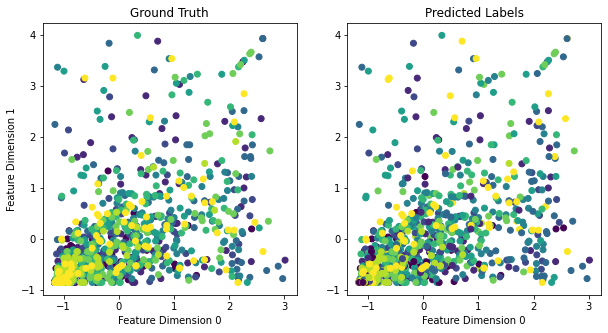

Category   - Accuracy
plane      - 69.0
car        - 64.0
bird       - 50.0
cat        - 42.0
deer       - 63.0
dog        - 58.0
frog       - 62.0
horse      - 57.0
ship       - 69.0
truck      - 66.0


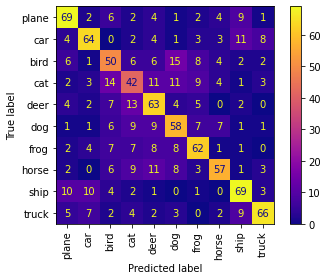

In [5]:


normaliser = StandardScaler()
normaliser.fit(extractedTrainArray)
extractedTrainArray = normaliser.transform(extractedTrainArray)
extractedTestArray = normaliser.transform(extractedTestArray)

#fit the data in the SVM model 
models = SVC(kernel='rbf')
models.fit(extractedTrainArray, train_labels.ravel())

#predict the classification 
prediction = models.predict(extractedTestArray)

score = models.score(extractedTestArray, test_labels.ravel())

print("Score: ", score * 100)

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(extractedTestArray[:,0], extractedTestArray[:,1],c=test_labels.ravel())
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')

plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
prediction = models.predict(extractedTestArray)
plt.scatter(extractedTestArray[:,0], extractedTestArray[:,1], c=prediction)
plt.show()

import sklearn.metrics
cm = sklearn.metrics.confusion_matrix(test_labels, prediction)


classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

#Plot and display the confusion matrix
displayMatrix = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
displayMatrix = displayMatrix.plot(cmap=plt.cm.plasma,values_format='g', xticks_rotation='vertical', include_values=True)


print('{0:10s} - {1}'.format('Category','Accuracy'))
for i, r in enumerate(cm):
    print('{0:10s} - {1:.1f}'.format(classes[i], r[i]/np.sum(r)*100))

# ----------------------------------------------------------------------------------------------------------------------------------------------------

# Convulutional Neural Networks (CNNs)

#### CNN: using Non-normalised data and validation (Chosen Model). 

In [6]:
#focus of this model is on feature extraction so we use multiple extraction layers and validate the input using testing data.
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Conv2D(32, [3,3], activation=tf.nn.relu,padding='same', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, [3,3], activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, [3,3], activation=tf.nn.relu),
    tf.keras.layers.Conv2D(128, [3,3], activation=tf.nn.relu),
    tf.keras.layers.Conv2D(256, [3,3], activation=tf.nn.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=tf.keras.metrics.CategoricalAccuracy(name="accuracy"))


history = model.fit(orgTrn, cat_train_labels, validation_data=(orgTst , cat_test_labels),epochs=100, batch_size =64)


Epoch 1/100
157/157 [==============================] - 3s 19ms/step - loss: 1.9811 - accuracy: 0.2530 - val_loss: 1.8130 - val_accuracy: 0.3110
Epoch 2/100
157/157 [==============================] - 2s 10ms/step - loss: 1.6180 - accuracy: 0.4023 - val_loss: 1.7641 - val_accuracy: 0.3920
Epoch 3/100
157/157 [==============================] - 2s 10ms/step - loss: 1.4621 - accuracy: 0.4625 - val_loss: 1.4405 - val_accuracy: 0.4840
Epoch 4/100
157/157 [==============================] - 2s 10ms/step - loss: 1.3301 - accuracy: 0.5140 - val_loss: 1.4179 - val_accuracy: 0.4770
Epoch 5/100
157/157 [==============================] - 2s 10ms/step - loss: 1.2420 - accuracy: 0.5484 - val_loss: 1.2452 - val_accuracy: 0.5630
Epoch 6/100
157/157 [==============================] - 2s 10ms/step - loss: 1.1616 - accuracy: 0.5803 - val_loss: 1.2503 - val_accuracy: 0.5700
Epoch 7/100
157/157 [==============================] - 2s 10ms/step - loss: 1.0753 - accuracy: 0.6136 - val_loss: 1.2670 - val_accuracy:

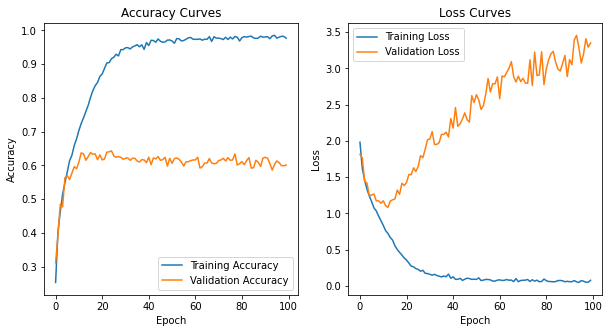

In [7]:
#Plot the accuracy and loss curves
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [8]:
results = model.evaluate(orgTst,cat_test_labels)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

32/32 [==============================] - 0s 8ms/step - loss: 3.3516 - accuracy: 0.6010
Test set loss: 3.35, test set accuracy: 60.10%


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Category   - Accuracy
plane      - 58.0
car        - 62.0
bird       - 51.0
cat        - 44.0
deer       - 55.0
dog        - 46.0
frog       - 68.0
horse      - 66.0
ship       - 86.0
truck      - 65.0


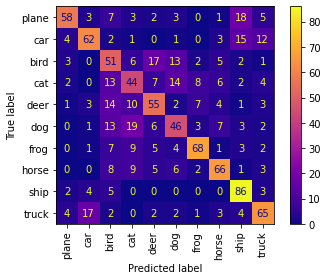

In [9]:
import sklearn.metrics
cnn_prediction = model.predict(orgTst)
rounded_cnn_prediction =model.predict_classes(orgTst)
confusionMatrix = sklearn.metrics.confusion_matrix(test_labels, rounded_cnn_prediction)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck')

#Plot and display the confusion matrix 
displayMatrix = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=classes)
displayMatrix = displayMatrix.plot(cmap=plt.cm.plasma,values_format='g', xticks_rotation='vertical', include_values=True)


print('{0:10s} - {1}'.format('Category','Accuracy'))
for i, r in enumerate(confusionMatrix):
    print('{0:10s} - {1:.1f}'.format(classes[i], r[i]/np.sum(r)*100))

I loaded the data, normalised it by dividing by 255 and then used a filter of 32, 64. I used the Adama optimiser and measured the training accuracy. I have achieved a training accuracy of 98% and a testing accuracy 62.4%

# ----------------------------------------------------------------------------------------------------------------------------------------------------

# Neural Network

## NN using hog features and validation (Chosen Model)

In [10]:
model_val_hf = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)
])

model_val_hf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/100
313/313 [==============================] - 2s 5ms/step - loss: 1.7129 - accuracy: 0.3778 - val_loss: 1.4957 - val_accuracy: 0.4720
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 1.3843 - accuracy: 0.5140 - val_loss: 1.4060 - val_accuracy: 0.5010
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 1.2604 - accuracy: 0.5550 - val_loss: 1.3649 - val_accuracy: 0.5310
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 1.1691 - accuracy: 0.5892 - val_loss: 1.3573 - val_accuracy: 0.5310
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 1.1011 - accuracy: 0.6096 - val_loss: 1.3976 - val_accuracy: 0.5200
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 1.0411 - accuracy: 0.6310 - val_loss: 1.4022 - val_accuracy: 0.5230
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 0.9841 - accuracy: 0.6566 - val_loss: 1.4429 - val_accuracy: 0.5190

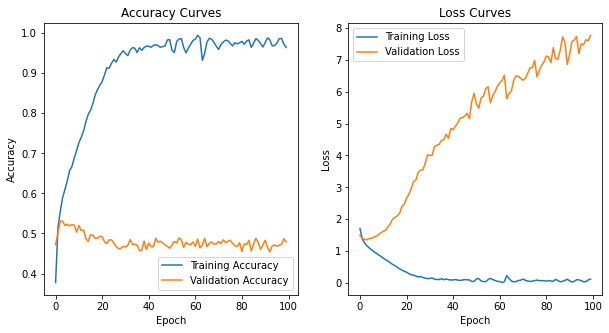

In [11]:
history_nn = model_val_hf.fit(extractedTrainArray, train_labels, validation_data =(extractedTestArray,test_labels),epochs=100)

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history_nn.history['accuracy'])
plt.plot(history_nn.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history_nn.history['loss'])
plt.plot(history_nn.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [12]:
test_loss_val_hf, test_acc_val_hf = model_val_hf.evaluate(extractedTestArray,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc_val_hf*100,'%')

32/32 - 0s - loss: 7.7663 - accuracy: 0.4790

Test accuracy: 47.90000021457672 %


Category   - Accuracy
plane      - 55.0
car        - 54.0
bird       - 35.0
cat        - 28.0
deer       - 43.0
dog        - 40.0
frog       - 49.0
horse      - 53.0
ship       - 58.0
truck      - 64.0


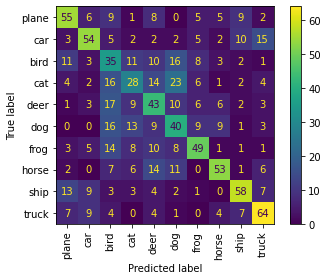

In [13]:


nn_prediction = model_val_hf.predict(extractedTestArray)
rounded_nn_prediction =model_val_hf.predict_classes(extractedTestArray)
confusion_nn_matrix = sklearn.metrics.confusion_matrix(test_labels, rounded_nn_prediction)



classes = ('plane', 'car', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck')
#Plot and display the confusion matrix 
displayMatrix = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_nn_matrix, display_labels=classes)
displayMatrix = displayMatrix.plot(cmap=plt.cm.viridis,values_format='g', xticks_rotation='vertical', include_values=True)

print('{0:10s} - {1}'.format('Category','Accuracy'))
for i, r in enumerate(confusion_nn_matrix):
    print('{0:10s} - {1:.1f}'.format(classes[i], r[i]/np.sum(r)*100))